In [1]:
import json
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")

In [2]:
def load_trials_dict(result_dict_location):
    if os.path.exists(result_dict_location):
        with open(result_dict_location, 'r') as f:
            data = json.load(f)
            return data
    return None

In [3]:
# DATA_PATH_TO_PLOT = "TrialResults/trial_results_first_512.json"
# DATA_PATH_TO_PLOT = 'TrialResults/trial_results_mid_512.json'
DATA_PATH_TO_PLOT = 'TrialResults/trial_results.json'

In [4]:
data = load_trials_dict(DATA_PATH_TO_PLOT)

In [5]:
data.keys()

dict_keys(['0.0_last', '0.0_middle', '0.1_last', '0.1_middle', '0.2_last', '0.2_middle', '0.3_last', '0.3_middle', '0.4_last', '0.4_middle', '0.5_last', '0.5_middle'])

In [6]:
num_neurons = os.path.splitext(os.path.basename(DATA_PATH_TO_PLOT))[0].split('_')[-1]


In [7]:
# data[list(data.keys())[0]]

In [8]:
std_dict = {}
for model_key in data.keys():
    for dropout_key, scores in data[model_key].items():
        if std_dict.get(model_key) is None:
            std_dict[model_key] = {}
        scores = np.array(scores)
        std_dict[model_key][dropout_key] = round(scores.std(), 6)
        data[model_key][dropout_key] = round(scores.mean(), 6)
        # print(np.round(np.sqrt(np.mean(np.power(arr - arr.mean(), 2))), 5), np.round(arr.std(), 5))

In [9]:
def get_data_as_tuples(primary_key):
    train_rate_acc, test_rate_acc = [], []
    for key in data[primary_key].keys():
        rate = round(float(key.split("_")[0]), 1)
        acc = data[primary_key][key]
        std = std_dict[primary_key][key]
        if "train" in key:
            train_rate_acc.append((rate, acc, std))  # (dropout_rate, accuracy-20-epochs)
        elif "test" in key:
            test_rate_acc.append((rate, acc, std))
    return train_rate_acc, test_rate_acc

In [10]:
train_rate_acc, test_rate_acc = get_data_as_tuples(list(data.keys())[0])

In [11]:
train_rate_acc

[(0.0, 0.981999, 0.000496),
 (0.1, 0.981818, 0.000494),
 (0.2, 0.981494, 0.000458),
 (0.3, 0.981427, 0.000468),
 (0.4, 0.980905, 0.000506),
 (0.5, 0.980762, 0.000397),
 (0.6, 0.979999, 0.000629),
 (0.7, 0.97882, 0.000529),
 (0.8, 0.976638, 0.00036),
 (0.9, 0.9689, 0.000484),
 (1.0, 0.1, 0.0),
 (0.9, 0.96222, 0.000736),
 (0.9, 0.956628, 0.000859),
 (0.9, 0.94534, 0.000915),
 (1.0, 0.912013, 0.00077),
 (1.0, 0.713787, 0.002587)]

In [12]:
test_rate_acc

[(0.0, 0.9201, 0.0),
 (0.1, 0.91966, 0.000483),
 (0.2, 0.919455, 0.000546),
 (0.3, 0.9195, 0.000848),
 (0.4, 0.919, 0.000731),
 (0.5, 0.918325, 0.000782),
 (0.6, 0.91809, 0.000997),
 (0.7, 0.91677, 0.000956),
 (0.8, 0.913515, 0.001247),
 (0.9, 0.90572, 0.001657),
 (1.0, 0.1, 0.0),
 (0.9, 0.899135, 0.0018),
 (0.9, 0.893505, 0.001642),
 (0.9, 0.88228, 0.001832),
 (1.0, 0.8516, 0.002628),
 (1.0, 0.67204, 0.002864)]

In [13]:
def get_unpacked_xy(test_list, train_list):
    test_rate = np.array([tup[0] for tup in test_list])
    test_acc = np.array([tup[1] for tup in test_list])
    test_std = np.array([tup[2] for tup in test_list])
    train_rate = np.array([tup[0] for tup in train_list])
    train_acc = np.array([tup[1] for tup in train_list])
    train_std = np.array([tup[2] for tup in train_list])
    return test_rate, test_acc, test_std, train_rate, train_acc, train_std

In [14]:
def get_num_neruons_str(key):
    if num_neurons == 'results':
        num_neurons_str = '256' if "mid" in key else '512'
    else:
        num_neurons_str = num_neurons
    return num_neurons_str

In [15]:
num_neurons_str = None
for primary_key in data.keys():
    train_rate_acc, test_rate_acc = get_data_as_tuples(primary_key)
    test_rate, test_acc, test_std, train_rate, train_acc, train_std = get_unpacked_xy(test_rate_acc, train_rate_acc)
    num_neurons_str = get_num_neruons_str(primary_key)
    dropout_rate, dropout_layer = primary_key.split('_')

    # fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(10, 10), layout='tight')
    # fig.suptitle(f"Dropout Layer: {dropout_layer[0].upper()}{dropout_layer[1:]}\n"
    #              f"Dropout Rate: {dropout_rate}\n"
    #              f"Neurons in Dropout Layer: {num_neurons_str}\n"
    #              f"Num. Trials: 20", fontsize=15)
    # ax[0, 0].scatter(test_rate, test_acc, c='r')
    # ax[0, 0].errorbar(test_rate, test_acc, test_std, c='r')
    # ax[0, 0].grid(True)
    # ax[0, 0].set_xticks(test_rate)
    # ax[0, 0].set_yticks(np.arange(0, 1.1, 0.1))
    # ax[0, 0].set_title('Testing Accuracy, Turnoff Rates: 0.0-1.0')
    # ax[0, 0].set_xlabel('Turnoff Rate')
    # ax[0, 0].set_ylabel('Accuracy')
    #
    # ax[0, 1].scatter(test_rate[:-1], test_acc[:-1], c='r')
    # ax[0, 1].errorbar(test_rate[:-1], test_acc[:-1], yerr=test_std[:-1], c='r')
    # ax[0, 1].grid(True)
    # ax[0, 1].set_xticks(test_rate[:-1])
    # ax[0, 1].set_yticks(np.arange(0.6, 1.05, 0.05))
    # ax[0, 1].set_title('Testing Accuracy, Turnoff Rates: 0.0-0.9')
    # ax[0, 1].set_xlabel('Turnoff Rate')
    # ax[0, 1].set_ylabel('Accuracy')
    #
    # ax[1, 0].scatter(train_rate, train_acc)
    # ax[1, 0].errorbar(train_rate, train_acc, train_std)
    # ax[1, 0].set_xticks(train_rate)
    # ax[1, 0].set_yticks(np.arange(0, 1.1, 0.1))
    # ax[1, 0].grid(True)
    # ax[1, 0].set_title("Training Accuracy, Turnoff Rates: 0.0-1.0")
    # ax[1, 0].set_xlabel('Turnoff Rate')
    # ax[1, 0].set_ylabel('Accuracy')
    #
    # ax[1, 1].scatter(train_rate[:-1], train_acc[:-1])
    # ax[1, 1].errorbar(train_rate[:-1], train_acc[:-1], train_std[:-1])
    # ax[1, 1].set_xticks(train_rate[:-1])
    # ax[1, 1].grid(True)
    # ax[1, 1].set_title("Training Accuracy, Turnoff Rates: 0.0-0.9")
    # ax[1, 1].set_yticks(np.arange(0.6, 1.05, 0.05))
    # ax[1, 1].set_xlabel('Turnoff Rate')
    # ax[1, 1].set_ylabel('Accuracy')
    #
    # ratio = test_acc / train_acc
    # ax[2, 0].plot(train_rate, ratio, 'g')
    # ax[2, 0].set_xticks(train_rate)
    # ax[2, 0].grid(True)
    # ax[2, 0].set_title("Ratio: Test Accuracy / Train Accuracy")
    # ax[2, 0].set_xlabel('Turnoff Rate')
    # ax[2, 0].set_ylabel('Ratio')
    #
    # ax[2, 1].set_xticks([])
    # ax[2, 1].set_yticks([])
    #
    # plt.tight_layout()
    # plt.show()
    # fig.savefig(f"SavedFigs/test/{primary_key}_{num_neurons_str}.png")  # Save the figure as PNG
    # plt.clf()  # Clear the entire figure in matplotlib

In [16]:
training_data = {}
testing_data = {}
for primary_key in data.keys():
    primary_key_new = f"{primary_key.replace('_', ' ')} dropout"
    training_data[primary_key_new] = {}
    testing_data[primary_key_new] = {}
    for secondary_key, curr_accuracy in data[primary_key].items():
        dropout_rate, eval_type = secondary_key.split('_')
        rounded_key = f"{round(float(dropout_rate), 2)} turnoff"
        if round(float(dropout_rate), 2) == 1.0:
            continue
        if 'test' in eval_type:
            testing_data[primary_key_new][rounded_key] = curr_accuracy
        else:
            training_data[primary_key_new][rounded_key] = curr_accuracy

In [17]:
testing_data_std = {}
for primary_key in std_dict.keys():
    primary_key_new = f"{primary_key.replace('_', ' ')} dropout"
    testing_data_std[primary_key_new] = []
    for secondary_key, curr_std in std_dict[primary_key].items():
        dropout_rate, eval_type = secondary_key.split('_')
        if round(float(dropout_rate), 2) == 1.0:
            continue
        if 'test' in eval_type:
            testing_data_std[primary_key_new].append(curr_std)

In [18]:
train_df = pd.DataFrame(training_data)
train_df = train_df[sorted(train_df.columns)]

In [19]:
test_df = pd.DataFrame(testing_data)
test_df = test_df[sorted(test_df.columns)]

In [20]:
locations = ["first", "middle", "last"]

[0.0018, 0.001642, 0.001832, 0.002628, 0.002864]
[0.001234, 0.001474, 0.001624, 0.002111, 0.004664]
[0.00141, 0.001222, 0.001847, 0.001982, 0.004091]
[0.001604, 0.001798, 0.001885, 0.00191, 0.004558]
[0.001073, 0.001498, 0.001688, 0.002797, 0.003476]
[0.001396, 0.001373, 0.001296, 0.002149, 0.003081]


<Figure size 800x550 with 0 Axes>

<Figure size 800x550 with 0 Axes>

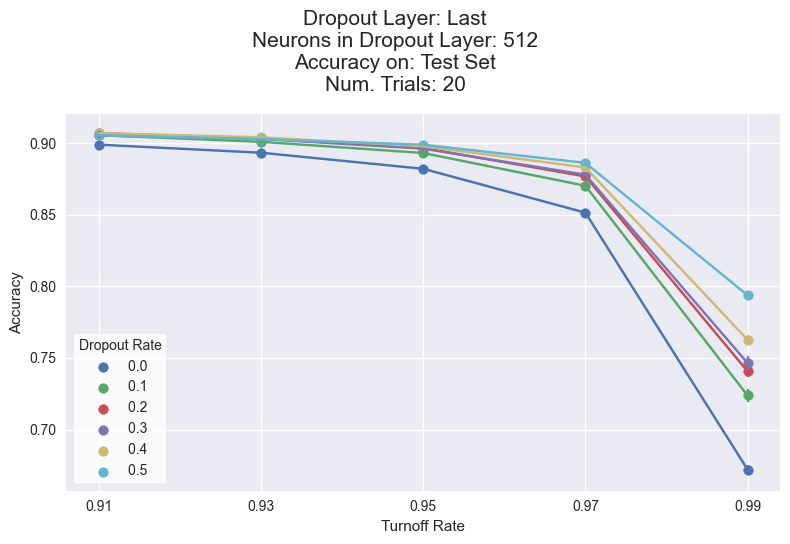

In [21]:
for location in locations:
    legend_labels = []
    turnoff_rates = [0.91, 0.93, 0.95, 0.97, 0.99]
    flag = False
    fig = plt.figure()
    for primary_key in sorted(testing_data.keys()):
        num_neurons_str = get_num_neruons_str(location)
        if location in primary_key:
            flag = True
            acc_lst = []
            legend_labels.append(primary_key.replace(f'{location} dropout', ''))
            for secondary_key, acc_value in testing_data[primary_key].items():
                if float(secondary_key.split(' ')[0]) in turnoff_rates:
                    acc_lst.append(acc_value)
            if len(acc_lst) == 0:
                flag = False
                break
            else:
                plt.scatter(turnoff_rates, acc_lst)
                print(testing_data_std[primary_key][-5:])
                plt.errorbar(turnoff_rates, acc_lst, yerr=testing_data_std[primary_key][-5:])
    if flag:  # only save plot if layer exists
        plt.xticks(turnoff_rates)
        # plt.yticks(np.arange(0.6, 1.05, 0.05))
        # plt.yticks(np.arange(0.88, 0.92, 0.01))  # zoomed in y axis for poster plot
        plt.xlabel("Turnoff Rate")
        plt.ylabel("Accuracy")
        plt.legend(legend_labels, title='Dropout Rate', frameon=True, facecolor='white')
        plt.suptitle(f"Dropout Layer: {location[0].upper()}{location[1:]}\n"
                     f"Neurons in Dropout Layer: {num_neurons_str}\n"
                     f"Accuracy on: Test Set\n"
                     f"Num. Trials: 20", fontsize=15)
        plt.grid(True)
        plt.tight_layout()
        plt.show()
        fig.savefig(f"SavedFigs/scatterPlots/{location}_{num_neurons_str}_test_zoomed.png")